In [1]:
# Instalação do pacote yfinance
#No VSCode utiliza o "%" no ligar do "!"
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Instalação das bibliotecas padrão
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Instação da biblioteca yfinance
import yfinance as yf

In [3]:
# Ajuste para o matplotlib e Pandas
%matplotlib inline

#float_format configurado para 6 casas decimais '%.6f' de notação cientifica para num. real
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x) 

In [4]:
# Criação de função referente a busca de dados da Selic
# Importante verificar a documentação conforme arquivo README.md para coleta dos dados na API do Banco Central (BC)
# Correção do DataFrame para ter a data como indice e corrigir o valor da selic de % para numeral
def BC_data_extract (code, start_date, end_date):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(code, start_date, end_date)
    df = pd.read_json(url)
    df = df.set_index('data')
    df.index = pd.to_datetime(df.index, dayfirst=True)
    df.columns = ['SELIC'] 
    df['SELIC'] = df['SELIC'] / 100
    return df
 

In [5]:
# Base de dados
dados = BC_data_extract(4390, '01/01/2010', '21/12/2023')
dados.head()

,SELIC
data,
2010-01-01,0.006600
2010-02-01,0.005900
2010-03-01,0.007600
2010-04-01,0.006700
2010-05-01,0.007500


In [6]:
ativos = ['ITUB4', 'EMBR3', 'VALE3']

for i in ativos:
  dados[i] = yf.download(i+'.SA',
                         start='2010-01-01',
                         end='2023-12-31',
                         interval='1mo')['Adj Close'].pct_change()
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
dados

,SELIC,ITUB4,EMBR3,VALE3
data,,,,
2010-01-01,0.006600,NaN,NaN,NaN
2010-02-01,0.005900,0.010241,-0.018018,0.031486
2010-03-01,0.007600,0.068494,0.072375,0.132805
2010-04-01,0.006700,-0.033334,-0.030419,-0.070866
2010-05-01,0.007500,-0.079575,-0.037055,-0.051699
2010-06-01,0.007900,-0.063103,-0.048205,-0.127000
2010-07-01,0.008600,0.218575,0.243241,0.112257
2010-08-01,0.008900,-0.044355,-0.060052,-0.034398
2010-09-01,0.008500,0.076278,0.093519,0.115614


In [9]:
#tratamento de dados do DataFrame
#Retirando a 1ª linha e adicionado 1 em todos campos de dados
dados = dados[1:]
dados = dados + 1
dados

,SELIC,ITUB4,EMBR3,VALE3
data,,,,
2010-03-01,1.007600,1.068494,1.072375,1.132805
2010-04-01,1.006700,0.966666,0.969581,0.929134
2010-05-01,1.007500,0.920425,0.962945,0.948301
2010-06-01,1.007900,0.936897,0.951795,0.873000
2010-07-01,1.008600,1.218575,1.243241,1.112257
2010-08-01,1.008900,0.955645,0.939948,0.965602
2010-09-01,1.008500,1.076278,1.093519,1.115614
2010-10-01,1.008100,1.025776,1.027573,1.024857
2010-11-01,1.008100,0.946064,1.023122,1.008104


In [10]:
acumulado = dados.cumprod()
acumulado

,SELIC,ITUB4,EMBR3,VALE3
data,,,,
2010-03-01,1.007600,1.068494,1.072375,1.132805
2010-04-01,1.014351,1.032876,1.039755,1.052527
2010-05-01,1.021959,0.950685,1.001227,0.998112
2010-06-01,1.030032,0.890694,0.952963,0.871352
2010-07-01,1.038890,1.085378,1.184763,0.969167
2010-08-01,1.048136,1.037236,1.113615,0.935830
2010-09-01,1.057046,1.116354,1.217759,1.044025
2010-10-01,1.065608,1.145130,1.251336,1.069976
2010-11-01,1.074239,1.083366,1.280269,1.078648


<Axes: title={'center': 'Ações vs Selic'}, xlabel='data'>

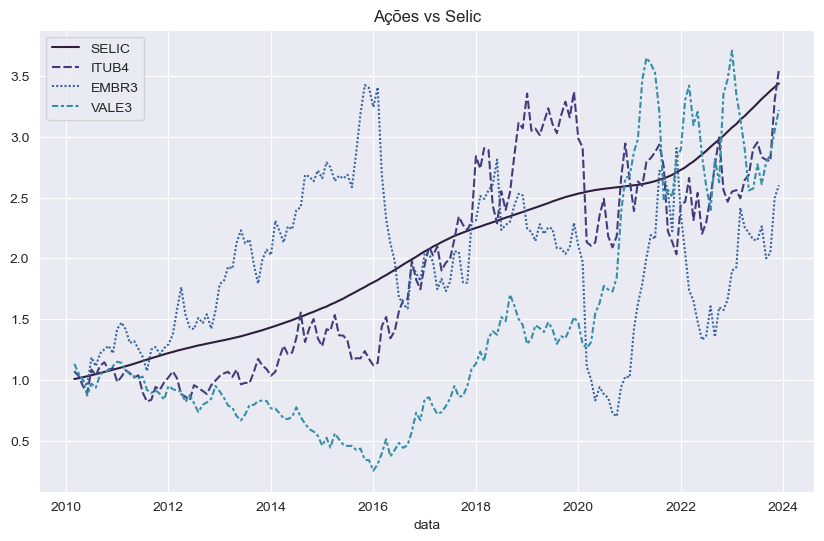

In [11]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_palette('mako')
plt.title('Ações vs Selic')
sns.lineplot(data = acumulado)


In [13]:
acumulado.corr()

,SELIC,ITUB4,EMBR3,VALE3
SELIC,1.000000,0.891387,0.169619,0.771298
ITUB4,0.891387,1.000000,0.175565,0.659972
EMBR3,0.169619,0.175565,1.000000,-0.119500
VALE3,0.771298,0.659972,-0.119500,1.000000


<Axes: title={'center': 'Correlação do Retorno Acumulado'}>

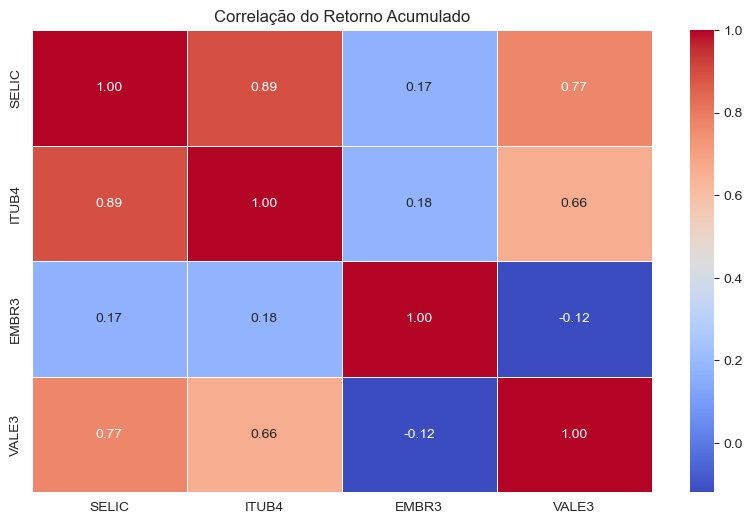

In [14]:
plt.figure(figsize =(10,6))
plt.title('Correlação do Retorno Acumulado')
sns.heatmap(acumulado.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)